In [2]:
from ultralytics import YOLO
import cv2
from PIL import Image
import easyocr
import matplotlib.pyplot as plt

In [3]:
model = YOLO("best.pt")  
DEVICE = 0 
reader = easyocr.Reader(['en'])

In [4]:
image_path = "data/test/images/01984a985e4bf80f_jpg.rf.108fdb3b623f373132434d2112f9a2b4.jpg"

In [5]:
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
results = model.predict(image_rgb, conf=0.6, device=DEVICE, verbose=False)

In [7]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'License_Plate'}
 obb: None
 orig_img: array([[[  9,   9,   9],
         [ 17,  19,  16],
         [ 22,  24,  21],
         ...,
         [  9,  12,  21],
         [  6,  10,  22],
         [  5,   9,  21]],
 
        [[ 16,  16,  18],
         [ 17,  18,  20],
         [ 14,  16,  15],
         ...,
         [ 11,  14,  19],
         [ 10,  15,  21],
         [ 10,  15,  21]],
 
        [[ 17,  16,  24],
         [ 15,  16,  21],
         [ 12,  13,  18],
         ...,
         [ 13,  18,  12],
         [ 14,  21,  14],
         [ 14,  21,  14]],
 
        ...,
 
        [[ 36,  31,  28],
         [ 37,  32,  29],
         [ 38,  33,  30],
         ...,
         [155, 131, 107],
         [159, 135, 111],
         [166, 142, 118]],
 
        [[ 40,  36,  33],
         [ 39,  35,  32],
         [ 37,  33,  30],
         ...,
         [1

Object 1 text:
70s92*-07



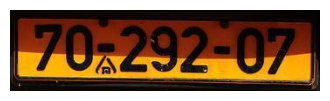

In [8]:
for i, box in enumerate(results[0].boxes.xyxy):
    x1, y1, x2, y2 = map(int, box)
    
    # Crop detected object
    cropped = image[y1:y2, x1:x2]  # OpenCV BGR format

    # Convert BGR → RGB for displaying
    cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

    # Run OCR (EasyOCR expects NumPy array)
    text_result = reader.readtext(cropped_rgb)

    # Extract and print only the text
    detected_text = " | ".join([t[1] for t in text_result])
    print(f"Object {i+1} text:\n{detected_text}\n")

    # Display cropped object inline
    plt.figure(figsize=(4,4))
    plt.imshow(cropped_rgb)
    plt.axis('off')
    plt.show()

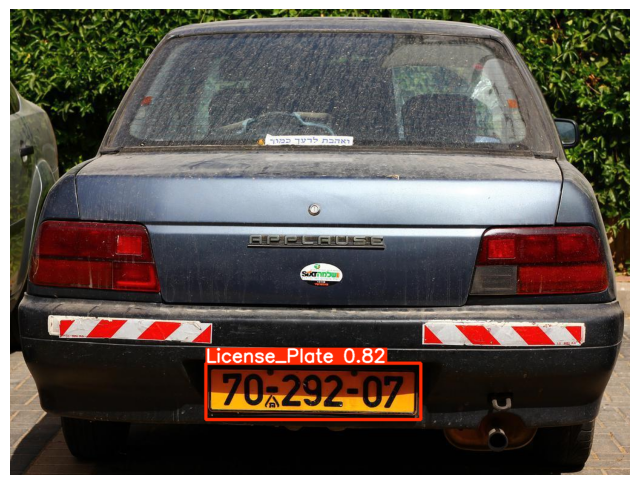

In [9]:
annotated = results[0].plot()
plt.figure(figsize=(8,8))
plt.imshow(annotated)
plt.axis('off')
plt.show()